In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import tree
import math
from sklearn.metrics import r2_score

In [2]:
intersections = pd.read_csv('/Users/reibertoldi/Documents/UBC/EOSC 510/Final Project/Analysis/Build/complete_intersections.csv')
monthly_data = pd.read_csv('/Users/reibertoldi/Documents/UBC/EOSC 510/Final Project/Analysis/Build/data_for_PCA.csv')

In [102]:
intersections_over1 = intersections[intersections['site_code1'].map(intersections['site_code1'].value_counts()) > 1]

In [106]:
list = intersections_over1.site_code1.unique()

In [114]:
appended_data = pd.DataFrame(columns=[['site_code', 'R2', 'Neighbors']])

for i in (list):
    lis = intersections[intersections.site_code1 == i].site_code2.tolist()
    monthly_filtered = monthly_data[lis]
    monthly_filtered = monthly_filtered.rename({i:"y"}, axis=1)
    monthly_filtered_norm = (monthly_filtered - monthly_filtered.mean())/monthly_filtered.std()
    y_complete = monthly_filtered_norm['y']
    x_complete = np.array(monthly_filtered_norm.drop(['y'],axis=1))
    
    monthly_filtered_norm['y'] = monthly_filtered_norm['y'].sample(frac=0.5)
    monthly_drop = monthly_filtered_norm.dropna()
    
    Y = np.array(monthly_drop['y'])
    X = np.array(monthly_drop.drop(['y'],axis=1))
    
    clf = tree.DecisionTreeRegressor()
    clf = clf.fit(X, Y)
    y_predict = clf.predict(x_complete)
    coefficient_of_dermination = r2_score(y_complete, y_predict)

    df = pd.DataFrame([[i, coefficient_of_dermination, len(lis)]], 
                      columns=[['site_code', 'R2', 'Neighbors']])
    appended_data = pd.concat([appended_data, df])

In [115]:
appended_data


,site_code,R2,Neighbors
0,332367N1167165W001,0.944452,5
0,332742N1166846W001,0.965117,5
0,332839N1167395W001,0.983628,5
0,332867N1167043W001,0.952672,5
0,333103N1166879W001,0.885159,5
...,...,...,...
0,392406N1214951W002,0.974842,9
0,392406N1214951W003,0.951424,9
0,392727N1215762W001,0.936071,8
0,392727N1215762W002,0.883827,8


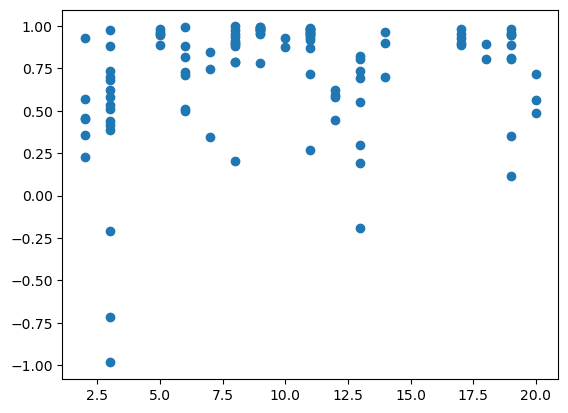

In [116]:
plt.scatter(appended_data['Neighbors'], appended_data['R2'])